<a href="https://colab.research.google.com/github/PeronxD/Python/blob/main/an%C3%A1lises_chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando os dados a serem analisados [GM Chess Games](https://www.kaggle.com/datasets/lazaro97/gm-chess-games?resource=download)

In [385]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [386]:
import pandas as pd
import numpy as np

In [387]:
dados_biog = pd.read_csv('players_biography.csv')

In [388]:
dados = dados_biog
dados.drop(columns = ['FIDE ID'],inplace=True)

In [389]:
dados.head(5)

,Name,Born,Results,White Results,Black Results,Active,Current Rating,Max Rating,Country
0,"Salem, A. R. Saleh",1993,Win: 46.9% (519) Loss: 26.6% (294) Draw: 26.6%...,Win: 50.7% (284) Loss: 23.4% (131) Draw: 25.9%...,Win: 43% (235) Loss: 29.8% (163) Draw: 27.2% (...,2002-08-22 to 2019-12-30,2682 on 2021-04-01,2682 on 2020-01-01,UAE
1,"Schwarz, Adolf",1836-10-31,Win: 28.6% (38) Loss: 42.1% (56) Draw: 29.3% (...,Win: 28.4% (19) Loss: 35.8% (24) Draw: 35.8% (...,Win: 28.8% (19) Loss: 48.5% (32) Draw: 22.7% (...,1873 to 1900,2657*,2657*,HUN/AUT
2,"Rakhmanov, Aleksandr",1989,Win: 40.6% (617) Loss: 17.9% (271) Draw: 41.5%...,Win: 46% (354) Loss: 14% (108) Draw: 40% (308)...,Win: 35.2% (263) Loss: 21.8% (163) Draw: 43% (...,2001-10-01 to 2020-12-17,2651 on 2021-04-01,2676 on 2017-05-01,RUS
3,"Alekhine, Alexander",1892-10-31,Win: 56.8% (725) Loss: 11.9% (152) Draw: 31.3%...,Win: 60.3% (417) Loss: 11.1% (77) Draw: 28.6% ...,Win: 52.6% (308) Loss: 12.8% (75) Draw: 34.5% ...,1906 to 1946,2700*,2700*,URS
4,"Areshchenko, Alexander",1986,Win: 43.6% (568) Loss: 14.7% (191) Draw: 41.7%...,Win: 52.7% (351) Loss: 11.6% (77) Draw: 35.7% ...,Win: 34.1% (217) Loss: 17.9% (114) Draw: 48% (...,1996 to 2019-12-08,2687 on 2021-04-01,2720 on 2012-12-01,UKR


## Verificar a consistência dos dados




In [390]:
dados.isna().sum() # temos alguns valores faltantes

Name              0
Born              0
Results           0
White Results     0
Black Results     0
Active            0
Current Rating    0
Max Rating        0
Country           0
dtype: int64

In [391]:
dados.info() # olhando para a tipagem das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            128 non-null    object
 1   Born            128 non-null    object
 2   Results         128 non-null    object
 3   White Results   128 non-null    object
 4   Black Results   128 non-null    object
 5   Active          128 non-null    object
 6   Current Rating  128 non-null    object
 7   Max Rating      128 non-null    object
 8   Country         128 non-null    object
dtypes: object(9)
memory usage: 9.1+ KB


## Tratamento do dataframe


In [392]:
# a ideia aqui é splitar essas variáveis para podermos pegar apenas a parte numérica útil
dados['Current Rating'] = dados['Current Rating'].str.strip().str.split(' ').str[0]
dados['Max Rating'] = dados['Max Rating'].str.strip().str.split(' ').str[0]
dados['Born'] = dados['Born'].str.strip().str.split('-').str[0]


In [393]:
import re

dados['Current Rating'] = dados['Current Rating'].str.replace(r'\D', '', regex=True)
dados['Born'] = dados['Born'].str.replace(r'\D', '', regex=True)
dados['Max Rating'] = dados['Max Rating'].str.replace(r'\D', '', regex=True)

# Converter para inteiros
dados['Current Rating'] = dados['Current Rating'].astype(int)
dados['Born'] = dados['Born'].astype(int)
dados['Max Rating'] = dados['Max Rating'].astype(int)


In [394]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            128 non-null    object
 1   Born            128 non-null    int64 
 2   Results         128 non-null    object
 3   White Results   128 non-null    object
 4   Black Results   128 non-null    object
 5   Active          128 non-null    object
 6   Current Rating  128 non-null    int64 
 7   Max Rating      128 non-null    int64 
 8   Country         128 non-null    object
dtypes: int64(3), object(6)
memory usage: 9.1+ KB


In [395]:
dados['Idade'] = 2021 - dados.Born # add coluna de idade dos jogadores

In [396]:
dados = dados.sort_values(by='Current Rating', ascending=False).reset_index(drop=True) # Ordenando em relação ao rating

## Análise exploratória


In [397]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,12)

In [398]:
dados.describe()

,Born,Current Rating,Max Rating,Idade
count,128.000000,128.000000,128.000000,128.000000
mean,1964.960938,2697.023438,2726.664062,56.039062
std,48.564010,42.273848,51.163668,48.564010
min,1806.000000,2650.000000,2650.000000,18.000000
25%,1973.000000,2663.750000,2685.250000,28.750000
50%,1986.000000,2683.000000,2719.000000,35.000000
75%,1992.250000,2715.250000,2761.000000,48.000000
max,2003.000000,2847.000000,2882.000000,215.000000


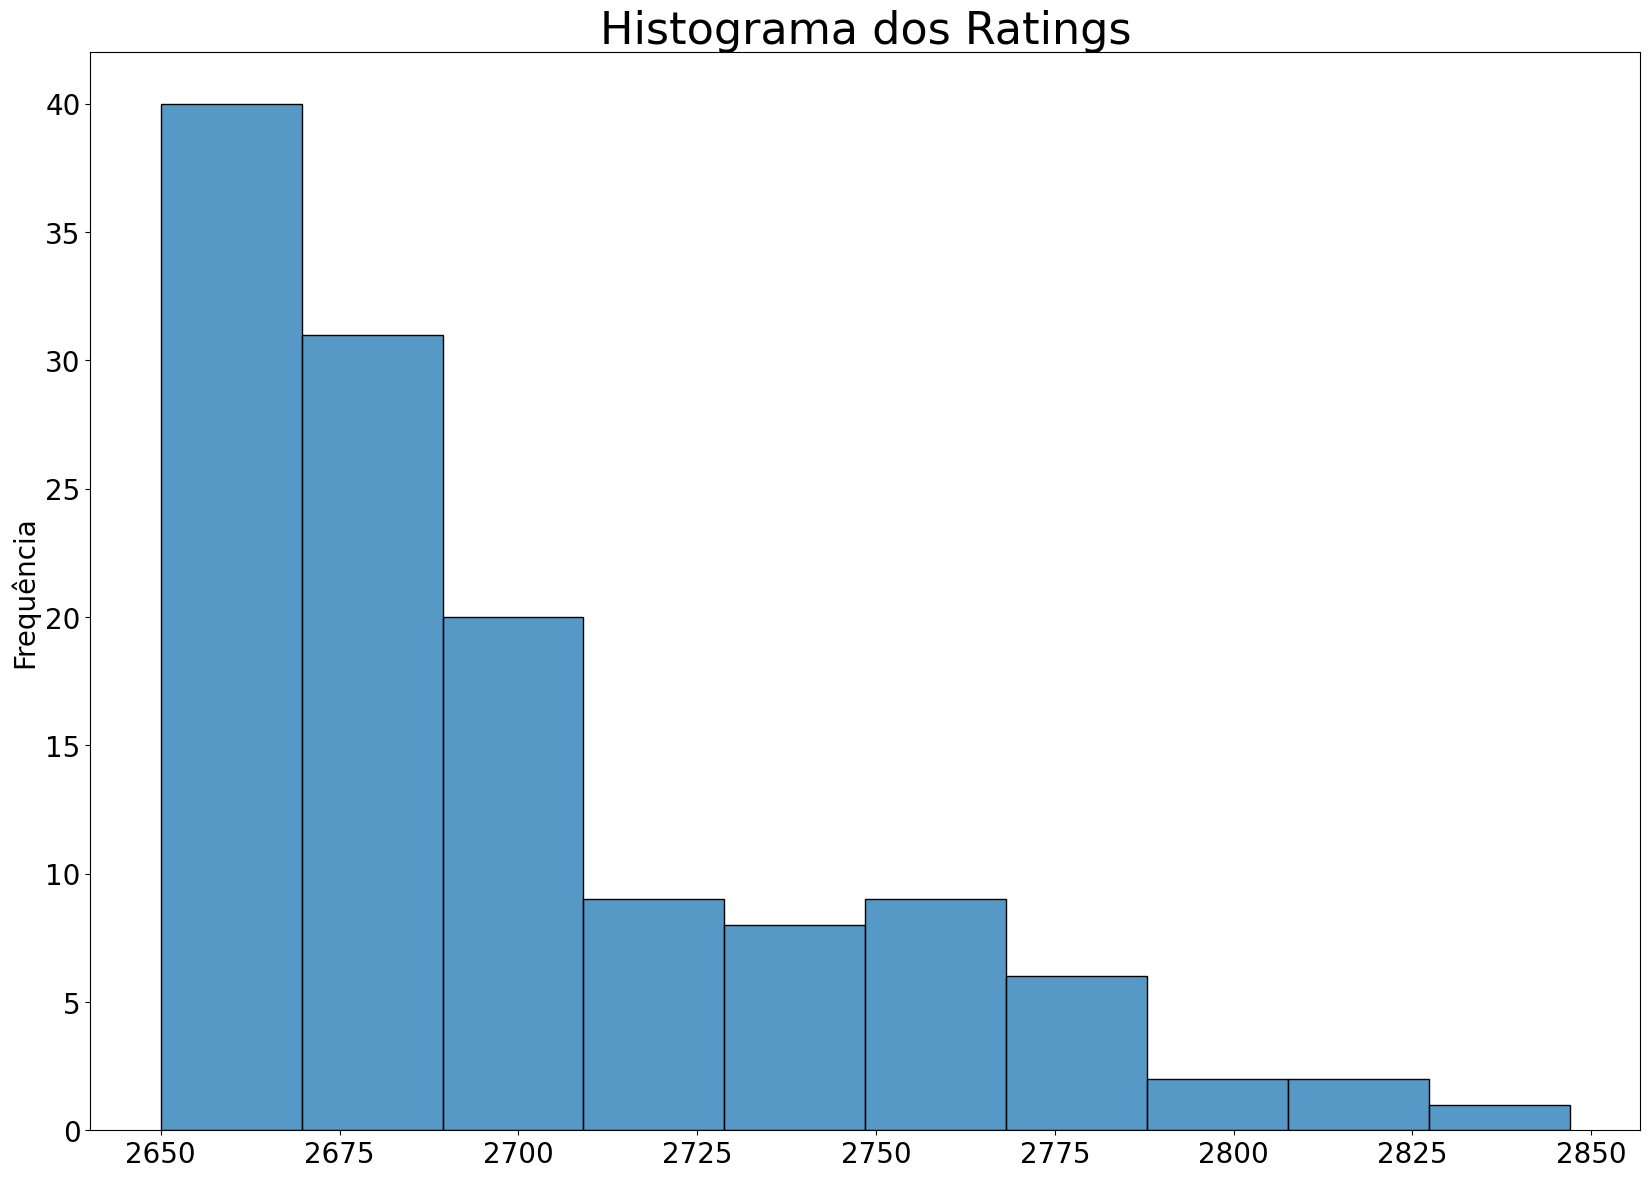

In [399]:
# Histograma dos ratings
sns.histplot(dados['Current Rating'])
plt.title('Histograma dos Ratings', fontsize=32)
plt.ylabel('Frequência',fontsize=20)
plt.xlabel('')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


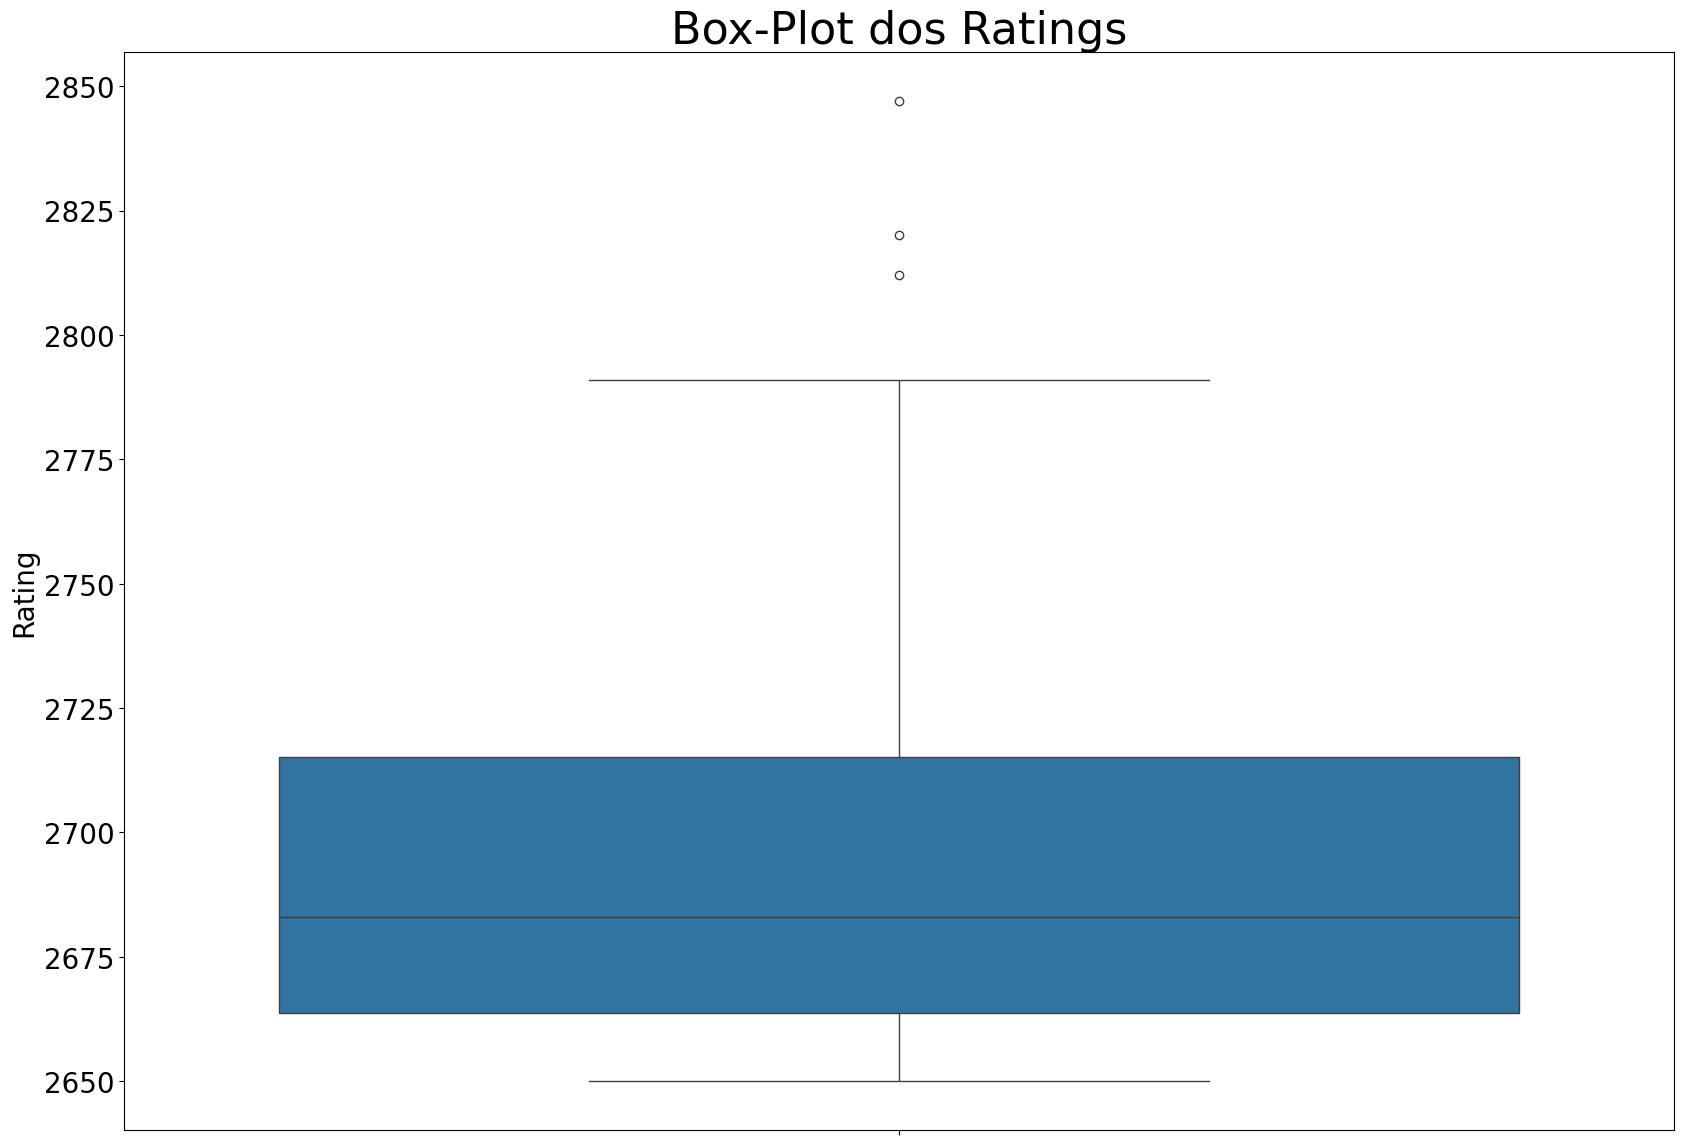

In [400]:
#boxplot dos ratings
sns.boxplot(dados['Current Rating'])
plt.title('Box-Plot dos Ratings', fontsize=32)
plt.ylabel('Rating',fontsize=20)
plt.xlabel('')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

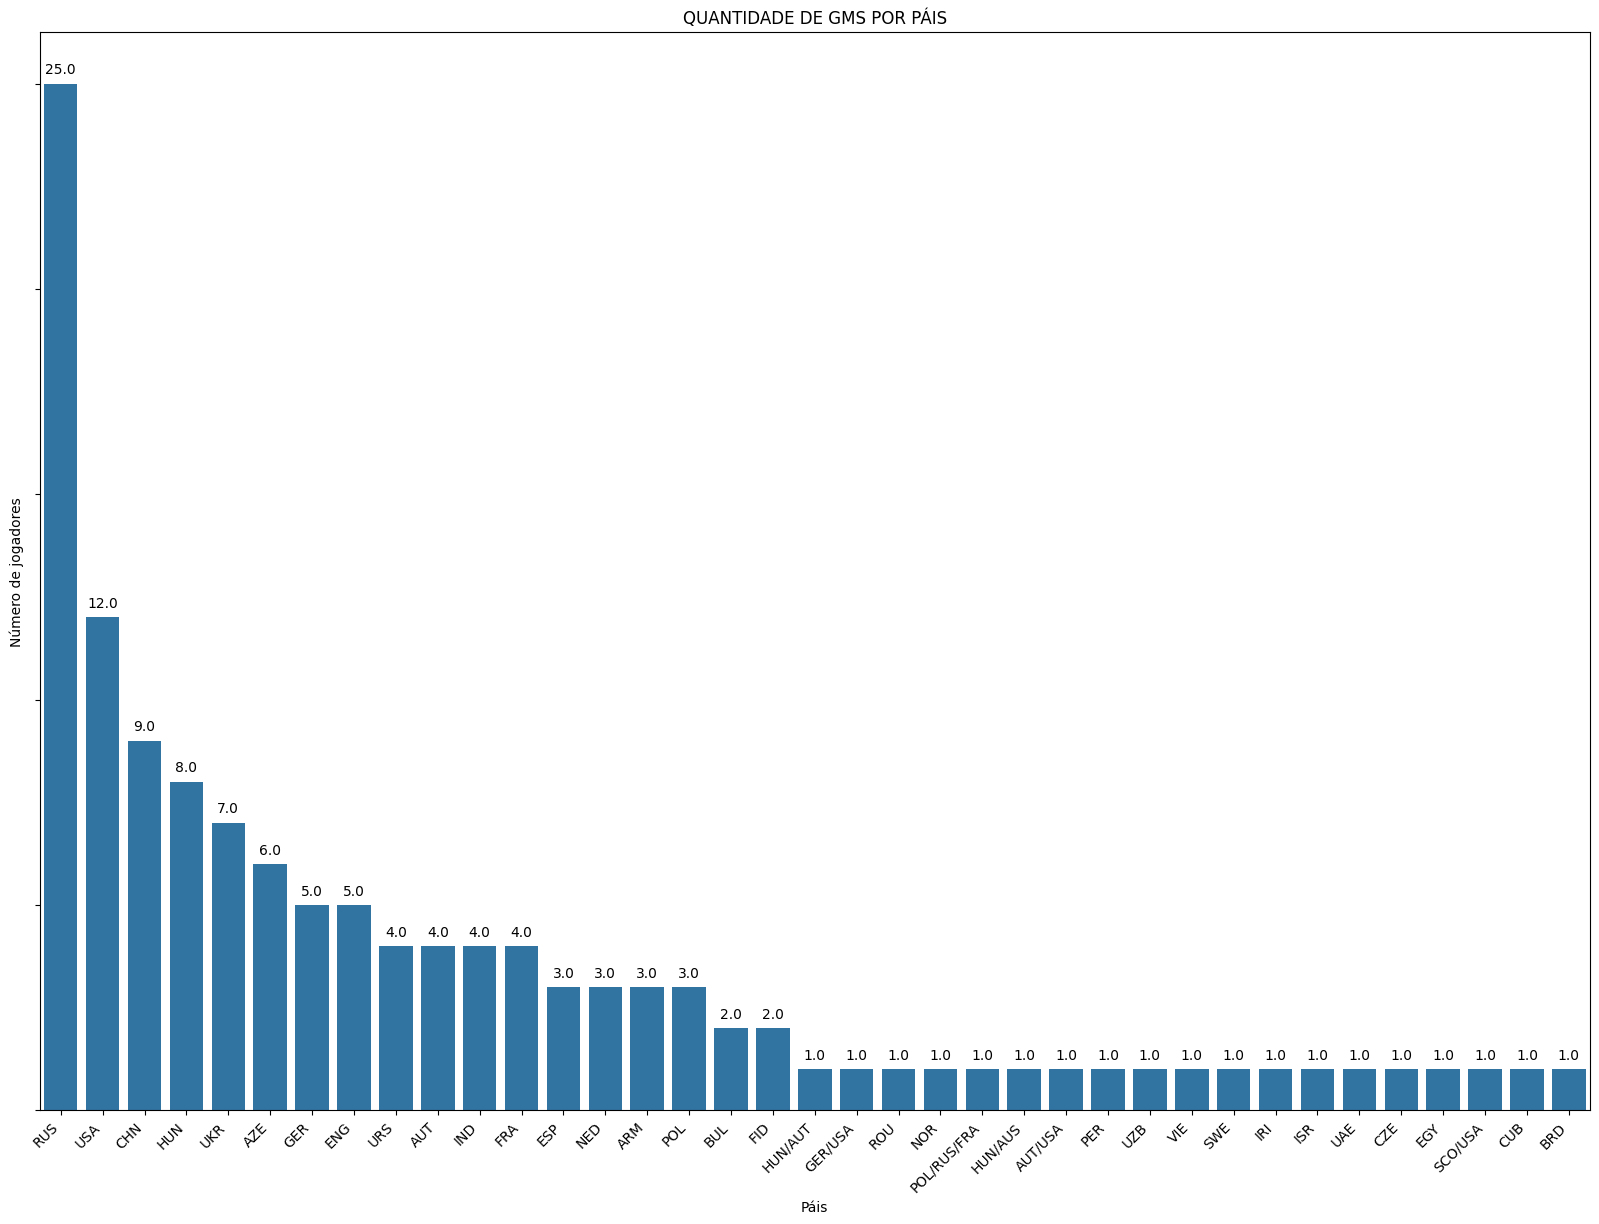

In [401]:
# quantidade de jogadores de cada país
ax = sns.countplot(data=dados, x='Country', order=dados['Country'].value_counts().index)

plt.xlabel('Páis')
plt.ylabel('Número de jogadores')
plt.title('QUANTIDADE DE GMS POR PÁIS')
ax.set(yticklabels=[])
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

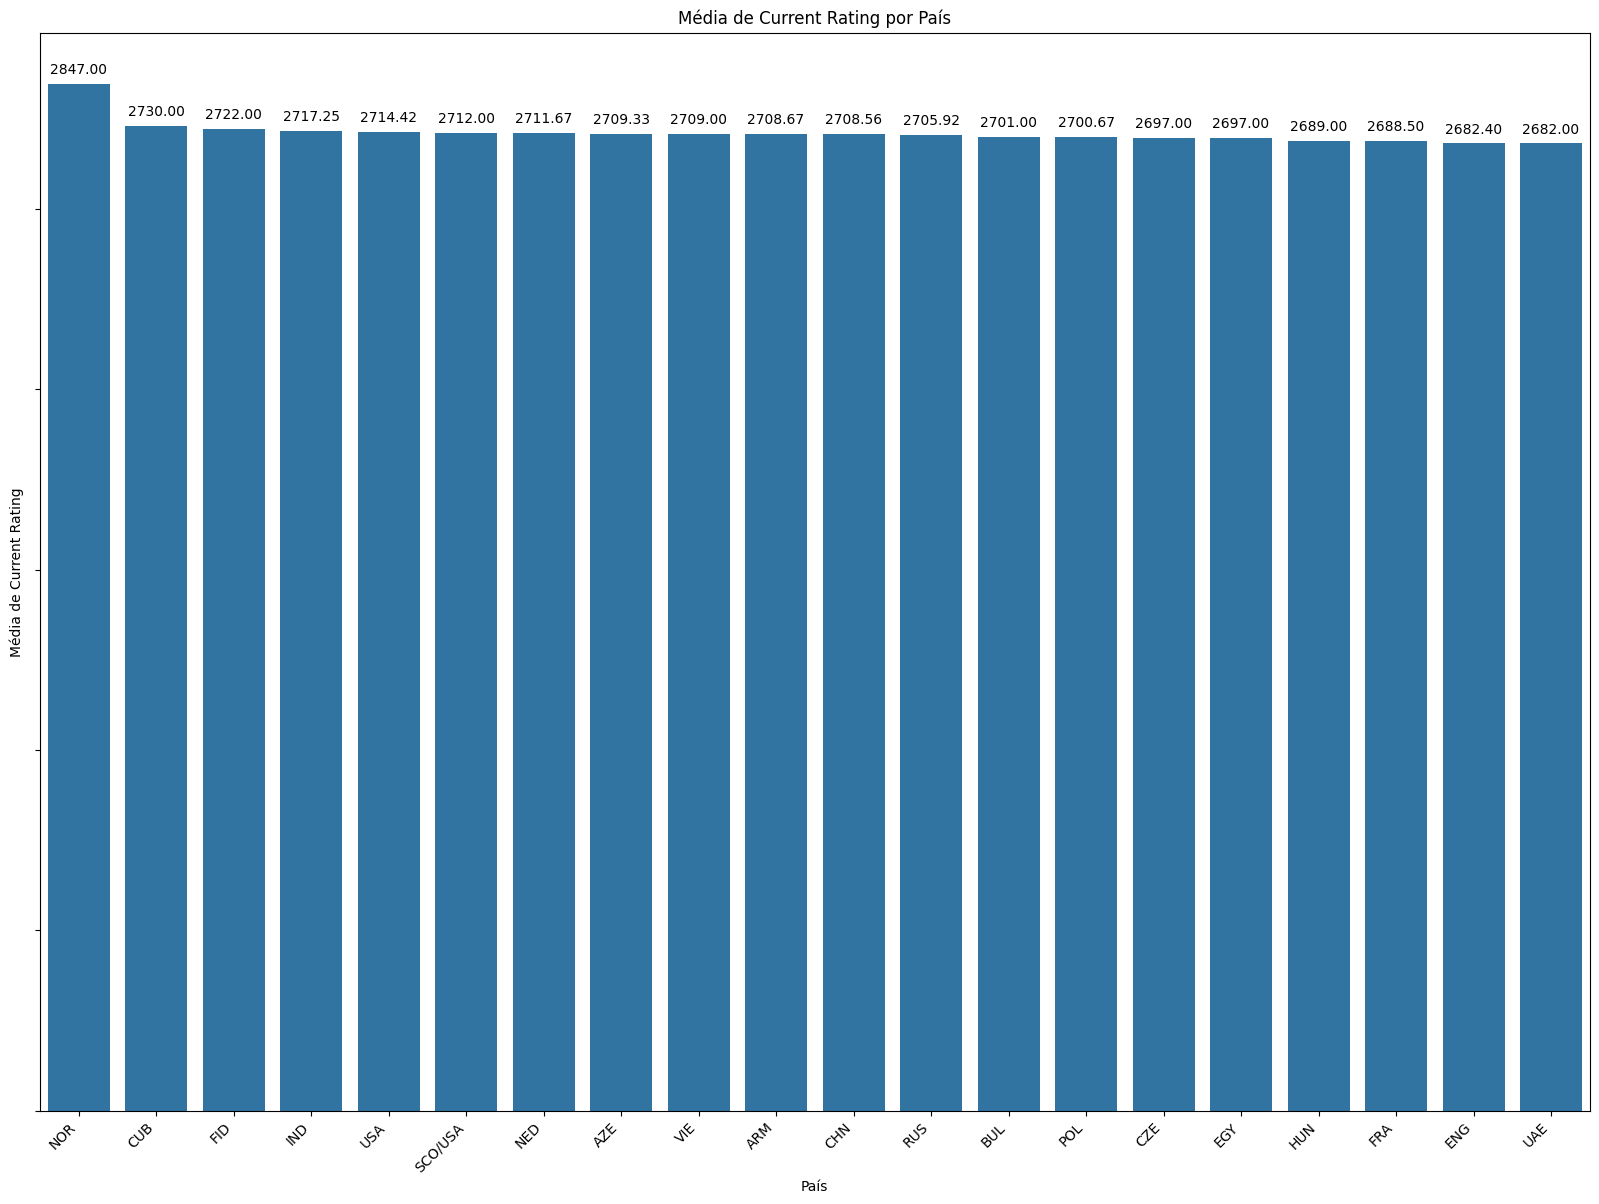

In [402]:
# média do rating de cada país
media_por_pais = dados.groupby('Country')['Current Rating'].mean().reset_index()
top10_medias = media_por_pais.sort_values(by='Current Rating', ascending=False).head(20)

ax = sns.barplot(data=top10_medias, x='Country', y='Current Rating')

plt.xlabel('País')
plt.ylabel('Média de Current Rating')
plt.title('Média de Current Rating por País')
ax.set(yticklabels=[])
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

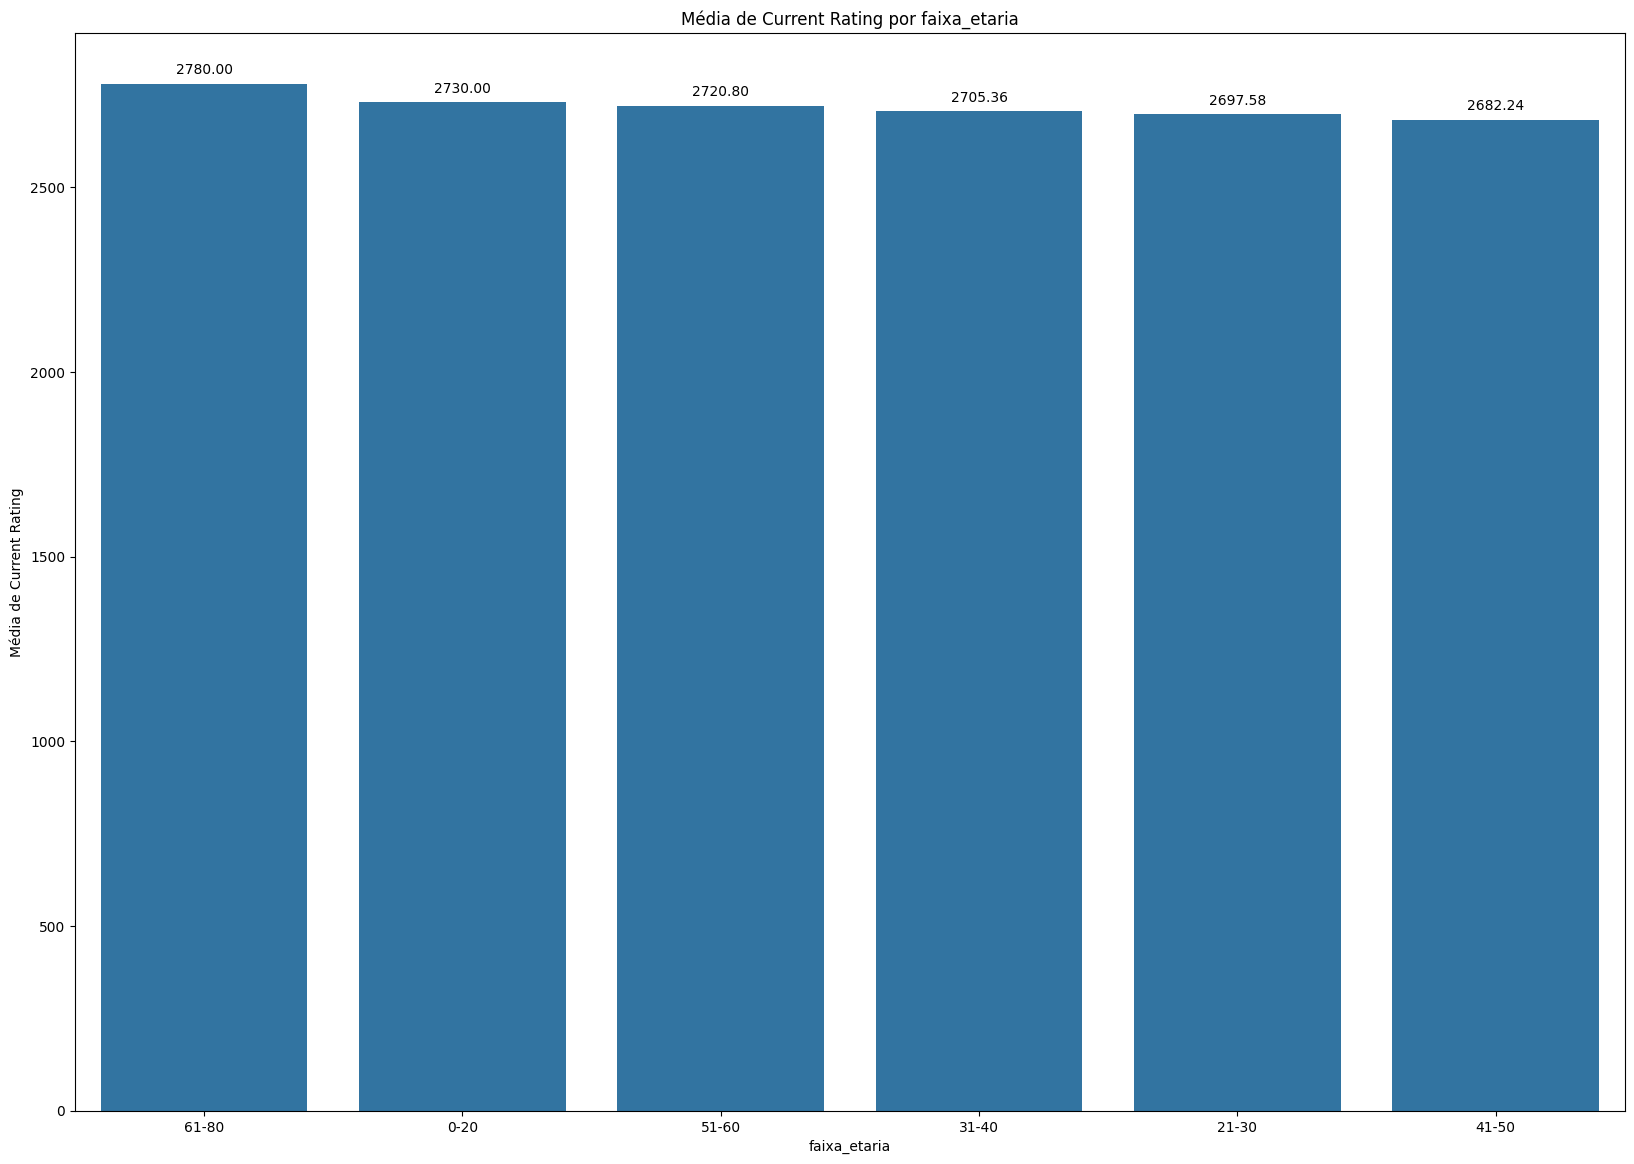

In [403]:
# média do rating por faixa de idade
faixas_etarias = [0, 20, 30, 40, 50, 60, 80]
dados['faixa_etaria'] = pd.cut(dados['Idade'], bins=faixas_etarias, labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-80'])

# média de 'Current Rating' para cada faixa_etaria
media_por_faixa = dados.groupby('faixa_etaria')['Current Rating'].mean()

# ordena as faixas etárias pela média de 'Current Rating'
media_por_faixa = media_por_faixa.sort_values(ascending=False)

ax = sns.barplot(x=media_por_faixa.index, y=media_por_faixa.values, order=media_por_faixa.index)

plt.xlabel('faixa_etaria')
plt.ylabel('Média de Current Rating')
plt.title('Média de Current Rating por faixa_etaria')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


##A partir daqui a minha ideia é validar algumas perguntas como por exemplo

*   Jogadores mais jovens (até 30 anos) tendem a arriscar mais enquanto os jogadores mais antigos(mais que 40 anos) são mais conservadores.
*   Existe diferença atualmente entre o estilo de jogo dos Russos e dos Americanos


## Jogadores mais jovens (até 30 anos) tendem a arriscar mais enquanto os jogadores mais antigos(mais que 40 anos) são mais conservadores.

In [404]:
dados.head(5)

,Name,Born,Results,White Results,Black Results,Active,Current Rating,Max Rating,Country,Idade,faixa_etaria
0,"Carlsen, Magnus",1990,Win: 45.2% (1326) Loss: 15.3% (449) Draw: 39.5...,Win: 52% (775) Loss: 13.2% (197) Draw: 34.7% (...,Win: 38.2% (551) Loss: 17.5% (252) Draw: 44.4%...,2000 to 2020-04-07,2847,2882,NOR,31,31-40
1,"Caruana, Fabiano",1992,Win: 38.8% (959) Loss: 22.6% (558) Draw: 38.6%...,Win: 45.2% (561) Loss: 19.6% (243) Draw: 35.2%...,Win: 32.4% (398) Loss: 25.6% (315) Draw: 42% (...,2001-10-22 to 2020-03-25,2820,2844,USA,29,21-30
2,"Kasparov, Garry",1963,Win: 50.4% (1096) Loss: 8.4% (183) Draw: 41.2%...,Win: 59.4% (719) Loss: 5.3% (64) Draw: 35.3% (...,Win: 39.1% (377) Loss: 12.3% (119) Draw: 48.6%...,1973 to 2017-08-18,2812,2851,RUS,58,51-60
3,"Ding, Liren",1992,Win: 34.8% (487) Loss: 16.1% (225) Draw: 49.2%...,Win: 40.7% (290) Loss: 14.3% (102) Draw: 44.9%...,Win: 28.6% (197) Loss: 17.9% (123) Draw: 53.6%...,2001-03-26 to 2020-03-25,2791,2816,CHN,29,21-30
4,"Nepomniachtchi, Ian",1990,Win: 39.9% (913) Loss: 19.6% (449) Draw: 40.5%...,Win: 46.3% (535) Loss: 15.6% (180) Draw: 38.1%...,Win: 33.3% (378) Loss: 23.7% (269) Draw: 42.9%...,2000-10-06 to 2020-12-15,2789,2789,RUS,31,31-40


In [405]:
# criando uma lista de strings com o split de Results
dados['Results'] = dados['Results'].str.split()
dados['White Results'] = dados['White Results'].str.split()
dados['Black Results'] = dados['Black Results'].str.split()


# Criando colunas específicas para Results
dados['taxa_vitoria'] = dados['Results'].apply(lambda x: x[1] if len(x) > 0 else None)
dados['numero_vitorias'] = dados['Results'].apply(lambda x: x[2] if len(x) > 0 else None)

dados['taxa_derrota'] = dados['Results'].apply(lambda x: x[4] if len(x) > 0 else None)
dados['numero_derrotas'] = dados['Results'].apply(lambda x: x[5] if len(x) > 0 else None)

dados['taxa_empate'] = dados['Results'].apply(lambda x: x[7] if len(x) > 0 else None)
dados['numero_empates'] = dados['Results'].apply(lambda x: x[8] if len(x) > 0 else None)




# Criando colunas específicas para White Results
dados['taxa_vitoria_brancas'] = dados['White Results'].apply(lambda x: x[1] if len(x) > 0 else None)
dados['numero_vitorias_brancas'] = dados['White Results'].apply(lambda x: x[2] if len(x) > 0 else None)

dados['taxa_derrota_brancas'] = dados['White Results'].apply(lambda x: x[4] if len(x) > 0 else None)
dados['numero_derrotas_brancas'] = dados['White Results'].apply(lambda x: x[5] if len(x) > 0 else None)

dados['taxa_empate_brancas'] = dados['White Results'].apply(lambda x: x[7] if len(x) > 0 else None)
dados['numero_empates_brancas'] = dados['White Results'].apply(lambda x: x[8] if len(x) > 0 else None)


# Criando colunas específicas para Black Results
dados['taxa_vitoria_pretas'] = dados['Black Results'].apply(lambda x: x[1] if len(x) > 0 else None)
dados['numero_vitorias_pretas'] = dados['Black Results'].apply(lambda x: x[2] if len(x) > 0 else None)

dados['taxa_derrota_pretas'] = dados['Black Results'].apply(lambda x: x[4] if len(x) > 0 else None)
dados['numero_derrotas_pretas'] = dados['Black Results'].apply(lambda x: x[5] if len(x) > 0 else None)

dados['taxa_empate_pretas'] = dados['Black Results'].apply(lambda x: x[7] if len(x) > 0 else None)
dados['numero_empates_pretas'] = dados['Black Results'].apply(lambda x: x[8] if len(x) > 0 else None)





In [406]:
# Definindo uma lista de colunas a serem processadas
colunas_a_processar = ['taxa_vitoria', 'numero_vitorias', 'taxa_derrota', 'numero_derrotas', 'taxa_empate', 'numero_empates',
                       'taxa_vitoria_brancas', 'numero_vitorias_brancas', 'taxa_derrota_brancas', 'numero_derrotas_brancas',
                       'taxa_empate_brancas', 'numero_empates_brancas', 'taxa_vitoria_pretas', 'numero_vitorias_pretas',
                       'taxa_derrota_pretas', 'numero_derrotas_pretas', 'taxa_empate_pretas', 'numero_empates_pretas']


for coluna in colunas_a_processar:
    dados[coluna] = dados[coluna].str.replace('[()%]', '', regex=True)

# Convertendo as colunas para os tipos desejados
colunas_numericas = ['numero_vitorias', 'numero_derrotas', 'numero_empates', 'numero_vitorias_brancas', 'numero_derrotas_brancas', 'numero_empates_brancas',
                     'numero_vitorias_pretas', 'numero_derrotas_pretas', 'numero_empates_pretas']

dados[colunas_numericas] = dados[colunas_numericas].astype('int', errors='ignore')

colunas_porcentagem = ['taxa_vitoria', 'taxa_derrota', 'taxa_empate', 'taxa_vitoria_brancas', 'taxa_derrota_brancas', 'taxa_empate_brancas',
                       'taxa_vitoria_pretas', 'taxa_derrota_pretas', 'taxa_empate_pretas']

dados[colunas_porcentagem] = dados[colunas_porcentagem].astype('float', errors='ignore') / 100.0


In [407]:
dados.drop(columns=['Results','White Results','Black Results'],inplace=True)

### Separando entre jovens (até 30 anos) e antigos (mais que 40 anos)

In [408]:
for i in range(len(dados.index)):
    if (dados.loc[i, 'faixa_etaria'] == '0-20') or (dados.loc[i, 'faixa_etaria'] == '21-30'):
        dados.loc[i, 'classificacao'] = 'Jovem'
    elif (dados.loc[i, 'faixa_etaria'] == '41-50') or (dados.loc[i, 'faixa_etaria'] == '51-60'):
        dados.loc[i, 'classificacao'] = 'Antigo'



In [409]:
jovens = dados[dados['classificacao'] == 'Jovem']

antigos = dados[dados['classificacao'] == 'Antigo']

In [410]:
jovens.shape[0],antigos.shape[0]

(38, 22)

In [411]:
jovens['Current Rating'].describe(), antigos['Current Rating'].describe()

(count      38.000000
 mean     2699.289474
 std        42.338346
 min      2652.000000
 25%      2666.250000
 50%      2689.000000
 75%      2709.750000
 max      2820.000000
 Name: Current Rating, dtype: float64,
 count      22.000000
 mean     2691.000000
 std        40.553316
 min      2656.000000
 25%      2662.250000
 50%      2675.500000
 75%      2709.000000
 max      2812.000000
 Name: Current Rating, dtype: float64)

In [412]:
# Médias
medias_vitoria_brancas = dados.groupby('classificacao')['taxa_vitoria_brancas'].mean()
medias_vitoria_pretas = dados.groupby('classificacao')['taxa_vitoria_pretas'].mean()

medias_derrota_brancas = dados.groupby('classificacao')['taxa_derrota_brancas'].mean()
medias_derrota_pretas = dados.groupby('classificacao')['taxa_derrota_pretas'].mean()

medias_empate_brancas = dados.groupby('classificacao')['taxa_empate_brancas'].mean()
medias_empate_pretas = dados.groupby('classificacao')['taxa_empate_pretas'].mean()

# Desvios padrão
desvios_vitoria_brancas = dados.groupby('classificacao')['taxa_vitoria_brancas'].std()
desvios_vitoria_pretas = dados.groupby('classificacao')['taxa_vitoria_pretas'].std()

desvios_derrota_brancas = dados.groupby('classificacao')['taxa_derrota_brancas'].std()
desvios_derrota_pretas = dados.groupby('classificacao')['taxa_derrota_pretas'].std()

desvios_empate_brancas = dados.groupby('classificacao')['taxa_empate_brancas'].std()
desvios_empate_pretas = dados.groupby('classificacao')['taxa_empate_pretas'].std()

# Coeficientes de variação
coef_var_vitoria_brancas = (desvios_vitoria_brancas / medias_vitoria_brancas) * 100
coef_var_vitoria_pretas = (desvios_vitoria_pretas / medias_vitoria_pretas) * 100

coef_var_derrota_brancas = (desvios_derrota_brancas / medias_derrota_brancas) * 100
coef_var_derrota_pretas = (desvios_derrota_pretas / medias_derrota_pretas) * 100

coef_var_empate_brancas = (desvios_empate_brancas / medias_empate_brancas) * 100
coef_var_empate_pretas = (desvios_empate_pretas / medias_empate_pretas) * 100

# Criar DataFrame
df_comparacao = pd.DataFrame({
    'media_vitoria_brancas': medias_vitoria_brancas,
    'desvio_padrao_vitoria_brancas': desvios_vitoria_brancas,
    'coef_var_vitoria_brancas': coef_var_vitoria_brancas,

    'media_vitoria_pretas': medias_vitoria_pretas,
    'desvio_padrao_vitoria_pretas': desvios_vitoria_pretas,
    'coef_var_vitoria_pretas': coef_var_vitoria_pretas,

    'media_derrota_brancas': medias_derrota_brancas,
    'desvio_padrao_derrota_brancas': desvios_derrota_brancas,
    'coef_var_derrota_brancas': coef_var_derrota_brancas,

    'media_derrota_pretas': medias_derrota_pretas,
    'desvio_padrao_derrota_pretas': desvios_derrota_pretas,
    'coef_var_derrota_pretas': coef_var_derrota_pretas,

    'media_empate_brancas': medias_empate_brancas,
    'desvio_padrao_empate_brancas': desvios_empate_brancas,
    'coef_var_empate_brancas': coef_var_empate_brancas,

    'media_empate_pretas': medias_empate_pretas,
    'desvio_padrao_empate_pretas': desvios_empate_pretas,
    'coef_var_empate_pretas': coef_var_empate_pretas,
}, index=['Antigo', 'Jovem'])

# Exibir o DataFrame resultante
df_comparacao


,media_vitoria_brancas,desvio_padrao_vitoria_brancas,coef_var_vitoria_brancas,media_vitoria_pretas,desvio_padrao_vitoria_pretas,coef_var_vitoria_pretas,media_derrota_brancas,desvio_padrao_derrota_brancas,coef_var_derrota_brancas,media_derrota_pretas,desvio_padrao_derrota_pretas,coef_var_derrota_pretas,media_empate_brancas,desvio_padrao_empate_brancas,coef_var_empate_brancas,media_empate_pretas,desvio_padrao_empate_pretas,coef_var_empate_pretas
Antigo,0.452000,0.060894,13.472153,0.304318,0.054688,17.970729,0.125955,0.037004,29.378719,0.203864,0.049014,24.042726,0.422000,0.060414,14.316032,0.491727,0.066680,13.560340
Jovem,0.481737,0.045610,9.467782,0.362368,0.050857,14.034521,0.160211,0.033653,21.005214,0.235895,0.036431,15.443835,0.357895,0.057658,16.110397,0.401789,0.068301,16.999316


Verificando se existe diferença significativa entre essas médias das taxas, como possuimos uma amostra pequena então iremos utilizar o teste não paramétrico Mann-Whitney. Importante ressaltar que obtivemos CV moderados altos, entre 10 e 30 % ou seja, talvez o teste não reflita a realidade tão bem


In [413]:
import scipy.stats as stats

statistic_1, p_value_1 =stats.mannwhitneyu(jovens['taxa_vitoria_pretas'], antigos['taxa_vitoria_pretas'])
statistic_2, p_value_2 = stats.mannwhitneyu(jovens['taxa_derrota_pretas'], antigos['taxa_derrota_pretas'])
statistic_3, p_value_3 = stats.mannwhitneyu(jovens['taxa_empate_pretas'], antigos['taxa_empate_pretas'])

statistic_4, p_value_4 = stats.mannwhitneyu(jovens['taxa_vitoria_brancas'], antigos['taxa_vitoria_brancas'])
statistic_5, p_value_5 = stats.mannwhitneyu(jovens['taxa_derrota_brancas'], antigos['taxa_derrota_brancas'])
statistic_6, p_value_6 = stats.mannwhitneyu(jovens['taxa_empate_brancas'], antigos['taxa_empate_brancas'])


In [414]:
testes = {'taxa_vitoria_pretas' : p_value_1 ,
          'taxa_derrota_pretas' : p_value_2,
          'taxa_empate_pretas' : p_value_3,
          'taxa_vitoria_brancas' : p_value_4 ,
          'taxa_derrota_brancas' : p_value_5,
          'taxa_empate_brancas' : p_value_6
          }

df_testes = pd.DataFrame(data = testes,index = ['p_valores'])
df_testes

,taxa_vitoria_pretas,taxa_derrota_pretas,taxa_empate_pretas,taxa_vitoria_brancas,taxa_derrota_brancas,taxa_empate_brancas
p_valores,0.000361,0.002916,0.000036,0.025597,0.000526,0.000182


Nota-se que os mais jovens tendem a vencer, e perderem mais também, tanto de bracncas quanto de pretas. Os mais antigos empatam mais tanto de brancas quanto de pretas, ou seja, os enxadristas mais novos arriscam mais nas partidas, por isso ganham mais porém também perdem mais

## Avaliando o estilo de jogo dos Russos e Americanos, para essa análise usaremos apenas jogadores atuais, ou seja, jogadores com menos de 40 anos

In [415]:
# Pegaremos os 8 jogadores com mais rating de cada país para a comparação
russos = dados[(dados['Country'] == 'RUS') & (dados['Idade'] <= 40)].head(8).reset_index(drop=True)
americanos = dados[(dados['Country'] == 'USA') & (dados['Idade'] <= 40)].head(8).reset_index(drop=True)

In [416]:
print('a média de rating dos russos é',russos['Current Rating'].mean()) , print('a média de rating dos americanos é',americanos['Current Rating'].mean())

a média de rating dos russos é 2736.0
a média de rating dos americanos é 2727.125


(None, None)

In [417]:
russos['Current Rating'].describe() , americanos['Current Rating'].describe()

(count       8.000000
 mean     2736.000000
 std        33.376639
 min      2706.000000
 25%      2709.750000
 50%      2720.000000
 75%      2762.000000
 max      2789.000000
 Name: Current Rating, dtype: float64,
 count       8.000000
 mean     2727.125000
 std        54.201838
 min      2660.000000
 25%      2686.500000
 50%      2722.500000
 75%      2761.000000
 max      2820.000000
 Name: Current Rating, dtype: float64)

In [418]:
pd.concat([americanos[['Name', 'Current Rating']], russos[['Name', 'Current Rating']]], axis = 1)

,Name,Current Rating,Name,Current Rating
0,"Caruana, Fabiano",2820,"Nepomniachtchi, Ian",2789
1,"So, Wesley",2770,"Grischuk, Alexander",2777
2,"Dominguez Perez, Leinier",2758,"Karjakin, Sergey",2757
3,"Nakamura, Hikaru",2736,"Andreikin, Dmitry",2725
4,"Xiong, Jeffrey",2709,"Vitiugov, Nikita",2715
5,"Shankland, Samuel L",2691,"Dubov, Daniil",2710
6,"Robson, Ray",2673,"Artemiev, Vladislav",2709
7,"Sevian, Samuel",2660,"Tomashevsky, Evgeny",2706


In [419]:
americanos.Name

0            Caruana, Fabiano
1                  So, Wesley
2    Dominguez Perez, Leinier
3            Nakamura, Hikaru
4              Xiong, Jeffrey
5         Shankland, Samuel L
6                 Robson, Ray
7              Sevian, Samuel
Name: Name, dtype: object

Nota-se que a média de rating dos Russos é superior à dos Americanos, além disso o rating dos Russos está mais concentrado em torno dessa média, sendo todos acima de 2700, entretanto existem alguns Americanos com rating maior que dos Russos.

Para comparar os estilos utilizaremos outra dataframe, onde temos informações de aberturas e taxas de vitoria,empate,derrota e número de jogos.

In [420]:
dados_biog_result = pd.read_csv('players_result_of_openings.csv')
dados_biog_result.columns = ['Name','Color','Opening','N_games','N_wins','N_losses','N_draws']

In [421]:
dados_biog_result.head()

,Name,Color,Opening,N_games,N_wins,N_losses,N_draws
0,"Salem, A. R. Saleh",white,"Bogo-Indian Defense, Grünfeld Variation",16,13,1,2
1,"Salem, A. R. Saleh",white,"Queen's Gambit Declined, Ragozin Defense",15,8,3,4
2,"Salem, A. R. Saleh",white,"King's Indian Defense, Saemisch Variation, Nor...",14,9,1,4
3,"Salem, A. R. Saleh",white,"Queen's Indian Defense, Kasparov-Petrosian Var...",11,5,3,3
4,"Salem, A. R. Saleh",white,"Slav Defense, General",10,3,4,3


In [422]:
# Filtrando apenas os 8 jogadores de cada país
op_americanos = dados_biog_result[dados_biog_result['Name'].isin(americanos['Name'])].reset_index(drop=True)
op_russos = dados_biog_result[dados_biog_result['Name'].isin(russos['Name'])].reset_index(drop=True)

Trasformando o DataFrame para faciltiar as análise, pegando as 3 aberturas de cada cor mais jogadas pro cada jogador, a partir disso será possível comparar as características de cada um.

In [423]:

americanos_agp = op_americanos.groupby('Name').apply(lambda x: x.sort_values(by='N_games', ascending=False)).reset_index(drop=True)
russos_agp = op_russos.groupby('Name').apply(lambda x: x.sort_values(by='N_games', ascending=False)).reset_index(drop=True)


In [424]:
americanos_top_op = americanos_agp.groupby(['Name', 'Color']).head(3).reset_index(drop=True)
russos_top_op = russos_agp.groupby(['Name', 'Color']).head(3).reset_index(drop=True)


In [425]:
americanos_top_op = americanos_top_op.sort_values(by=['Name','Color']).reset_index(drop=True)
russos_top_op = russos_top_op.sort_values(by=['Name','Color']).reset_index(drop=True)

In [426]:
americanos_lista_aberturas = americanos_top_op['Opening'].str.split(',')
americanos_lista = pd.DataFrame({
    'Aberturas': americanos_lista_aberturas.apply(lambda x: ', '.join([x[0], x[1]]) if len(x) > 1 else None)
})
americanos_lista.groupby('Aberturas').value_counts()

Aberturas
Caro-Kann Defense,  Advance Variation                1
Catalan Opening,  Closed Variation                   2
Catalan Opening,  General                            1
English Opening,  Anglo-Indian Defense               1
English Opening,  King's English Variation           2
French Defense,  Tarrasch Variation                  1
Gruenfeld Defense,  Exchange Variation               1
Italian Game,  Classical Variation                   1
Italian Game,  Italian Variation                     2
King's Indian Attack,  General                       3
Nimzowitsch-Larsen Attack,  General                  1
Semi-Slav Defense,  General                          1
Semi-Slav Defense,  Stoltz Variation                 2
Sicilian Defense,  Canal Attack                      2
Sicilian Defense,  Closed Variation                  1
Sicilian Defense,  French Variation                  1
Sicilian Defense,  Kan Variation                     3
Sicilian Defense,  Najdorf Variation                 4


In [427]:
russos_lista_aberturas = russos_top_op['Opening'].str.split(',')
russos_lista = pd.DataFrame({
    'Aberturas': russos_lista_aberturas.apply(lambda x: ', '.join([x[0], x[1]]) if len(x) > 1 else None)
})
russos_lista.groupby('Aberturas').value_counts()

Aberturas
Caro-Kann Defense,  Advance Variation                2
English Opening,  Anglo-Slav Variation               1
English Opening,  King's English Variation           5
Gruenfeld Defense,  Exchange Variation               1
Indian Game,  General                                1
King's Indian Attack,  General                       2
King's Indian Attack,  Symmterical Defense           2
King's Indian Defense,  Normal Variation             1
Modern Defense,  King Pawn Fianchetto                1
Nimzo-Larsen Attack,  Classical Variation            1
Queen's Indian Defense,  Fianchetto Variation        1
Scotch Game,  Mieses Variation                       1
Sicilian Defense,  Canal Attack                      1
Sicilian Defense,  Chekhover Variation               1
Sicilian Defense,  Closed Variation                  1
Sicilian Defense,  French Variation                  1
Sicilian Defense,  Kan Variation                     2
Sicilian Defense,  Lasker-Pelikan Variation          1


A partir das aberturas nota-se que ambos jogam em sua maioria Ruy Lopez e Siciliana, os Russos jogam mais variantes da Siciliana (9) e também jogam mais Índia do Rei que os Americanos (5 x 3), essas defesas tendem a serem mais agressivas.

Os Americanos jogam Catalan e Semi Slava, ja os Russos não possuem registros dessas aberturas, essas aberturas são mais sólidas e tendem a serem mais empatativas.

No geral ambos possuem um repertório bem parecido, entretanto os Russos tendem a partir para aberturas e defesas mais agressivas, como siciliana e índia do rei, já os Ameriacanos também jogam sicilianas porém possuem um repertória mais sólido, com semi slava e catalan



Agora iremos olhar para as taxas de vitória empate e derrota de cada país

In [428]:
taxas_americanos = pd.DataFrame({
    'taxa_vitoria': (americanos_top_op['N_wins'] / americanos_top_op['N_games']).round(2),
    'taxa_derrota': (americanos_top_op['N_losses'] / americanos_top_op['N_games']).round(2),
    'taxa_empate': (americanos_top_op['N_draws'] / americanos_top_op['N_games']).round(2)
})

taxas_russos = pd.DataFrame({
    'taxa_vitoria': (russos_top_op['N_wins'] / russos_top_op['N_games']).round(2),
    'taxa_derrota': (russos_top_op['N_losses'] / russos_top_op['N_games']).round(2),
    'taxa_empate': (russos_top_op['N_draws'] / russos_top_op['N_games']).round(2)
})


In [429]:
americanos_df = pd.concat([americanos_top_op,taxas_americanos], axis=1)
russos_df = pd.concat([russos_top_op,taxas_russos], axis=1)


In [430]:
americanos_df.head()

,Name,Color,Opening,N_games,N_wins,N_losses,N_draws,taxa_vitoria,taxa_derrota,taxa_empate
0,"Caruana, Fabiano",black,"Sicilian Defense, Kan Variation, Knight Variation",27,11,8,8,0.41,0.30,0.30
1,"Caruana, Fabiano",black,"Spanish Game, Morphy Defense",27,8,3,16,0.30,0.11,0.59
2,"Caruana, Fabiano",black,"Sicilian Defense, Kan Variation, Polugaevsky V...",23,10,8,5,0.43,0.35,0.22
3,"Caruana, Fabiano",white,"Spanish Game, General",71,31,13,27,0.44,0.18,0.38
4,"Caruana, Fabiano",white,"Spanish Game, Berlin Defense, l'Hermet Variation",29,8,2,19,0.28,0.07,0.66


In [431]:
americanos_df_win = americanos_df.sort_values(by='taxa_vitoria', ascending=False).reset_index(drop=True)
americanos_df_win.head()

,Name,Color,Opening,N_games,N_wins,N_losses,N_draws,taxa_vitoria,taxa_derrota,taxa_empate
0,"Robson, Ray",white,"Sicilian Defense, Najdorf Variation, English A...",25,18,4,3,0.72,0.16,0.12
1,"Xiong, Jeffrey",white,"French Defense, Tarrasch Variation, Chistyakov...",3,2,1,0,0.67,0.33,0.00
2,"Caruana, Fabiano",white,"Sicilian Defense, Nyezhmetdinov-Rossolimo Attack",26,15,3,8,0.58,0.12,0.31
3,"Robson, Ray",white,"Sicilian Defense, Kan Variation, Modern Variation",14,8,1,5,0.57,0.07,0.36
4,"Nakamura, Hikaru",white,"Nimzowitsch-Larsen Attack, General",33,18,3,12,0.55,0.09,0.36


In [432]:
russos_df_win = russos_df.sort_values(by='taxa_vitoria', ascending=False).reset_index(drop=True)
russos_df_win.head()

,Name,Color,Opening,N_games,N_wins,N_losses,N_draws,taxa_vitoria,taxa_derrota,taxa_empate
0,"Dubov, Daniil",white,"King's Indian Attack, Symmterical Defense",14,10,1,3,0.71,0.07,0.21
1,"Dubov, Daniil",white,"English Opening, King's English Variation, Fou...",28,17,3,8,0.61,0.11,0.29
2,"Tomashevsky, Evgeny",white,"King's Indian Defense, Normal Variation, Rare ...",18,11,0,7,0.61,0.00,0.39
3,"Tomashevsky, Evgeny",white,"English Opening, Anglo-Slav Variation, General",18,10,1,7,0.56,0.06,0.39
4,"Artemiev, Vladislav",white,"King's Indian Attack, Symmterical Defense",16,9,1,6,0.56,0.06,0.38


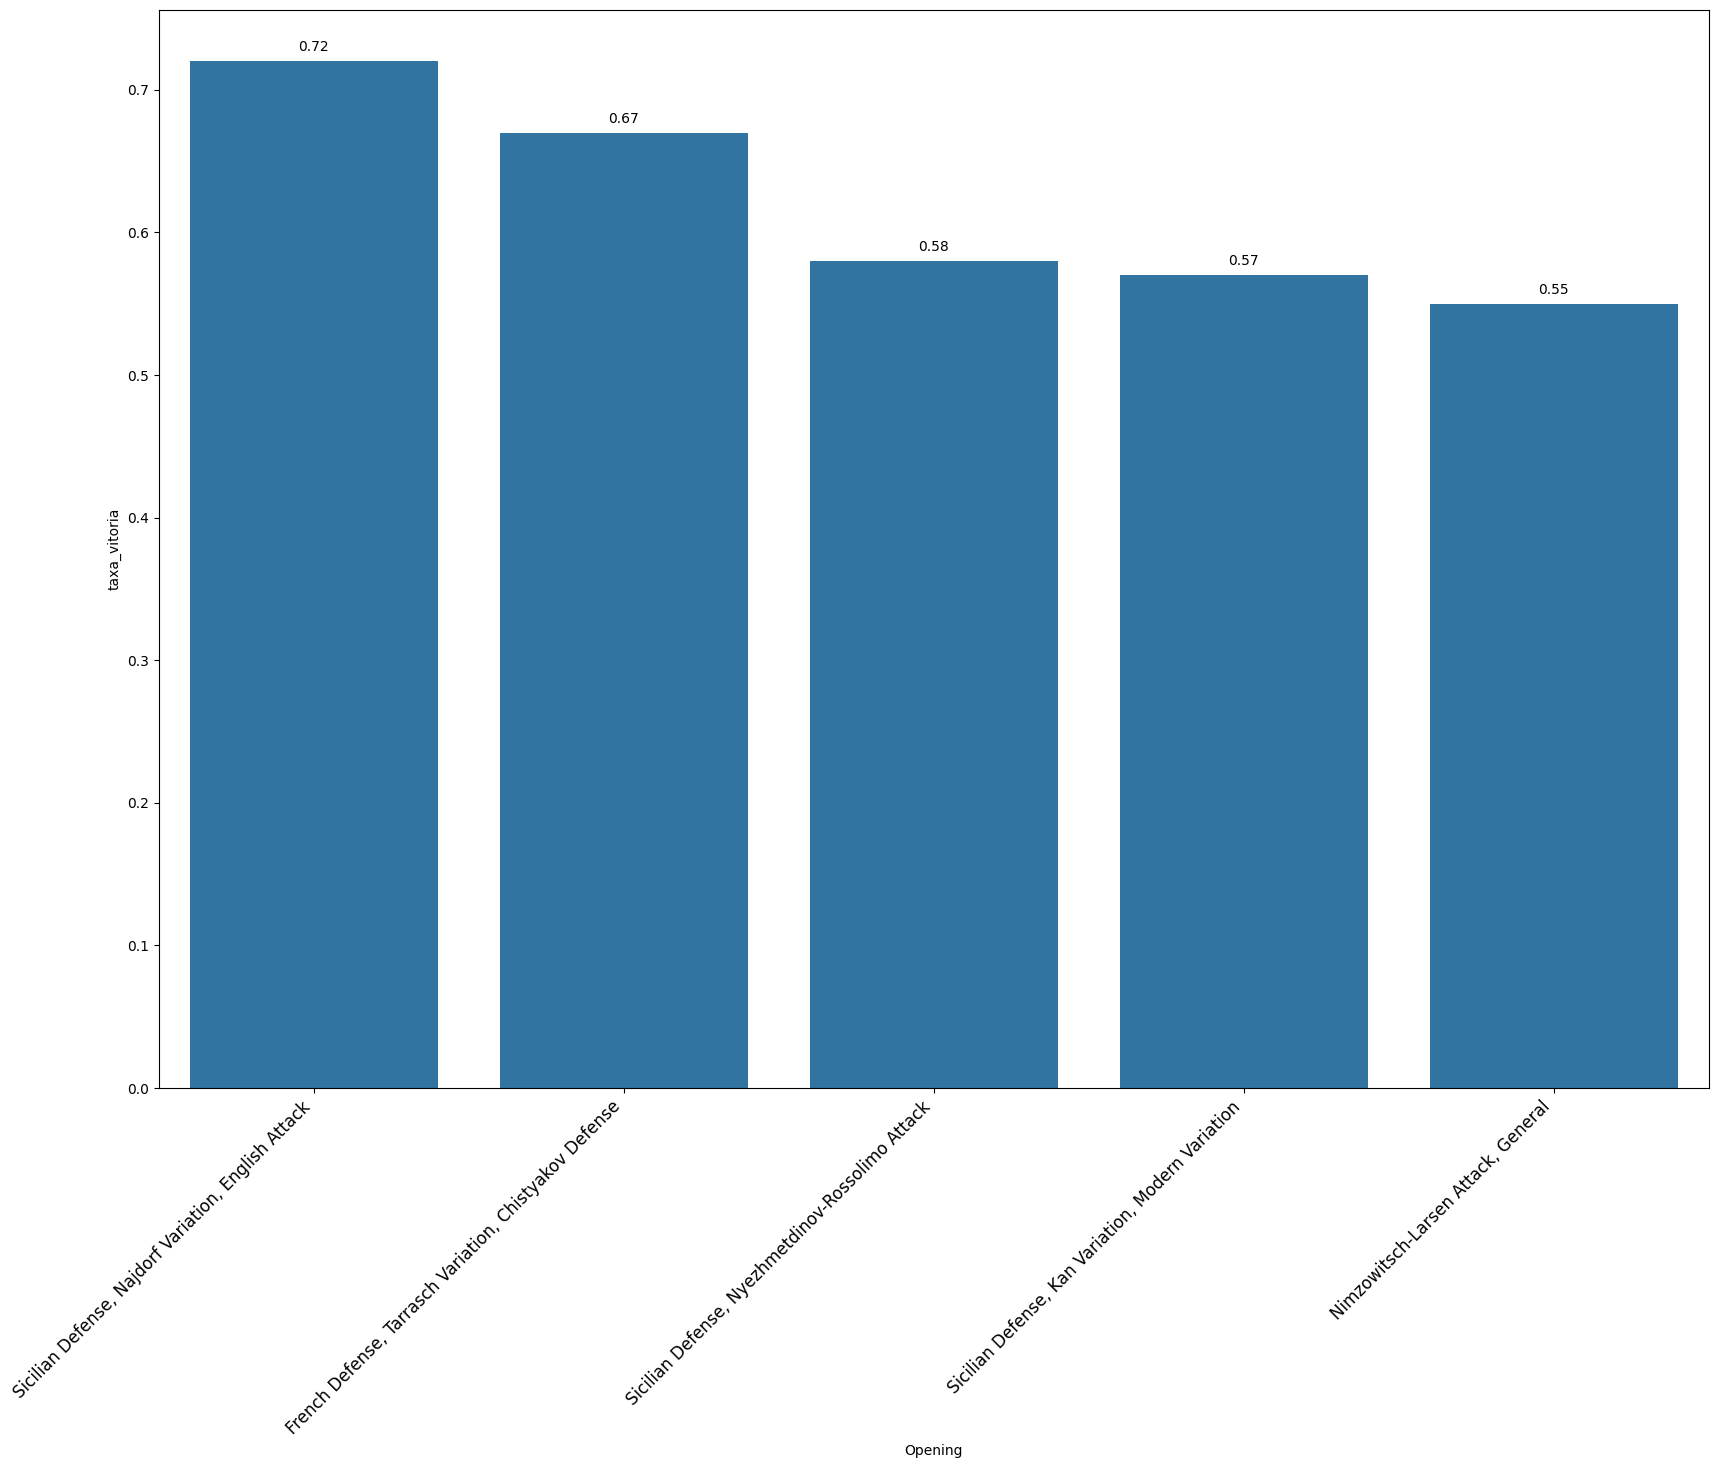

In [433]:
ax = sns.barplot(data=americanos_df_win.head(), x='Opening', y='taxa_vitoria', errorbar=None)
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


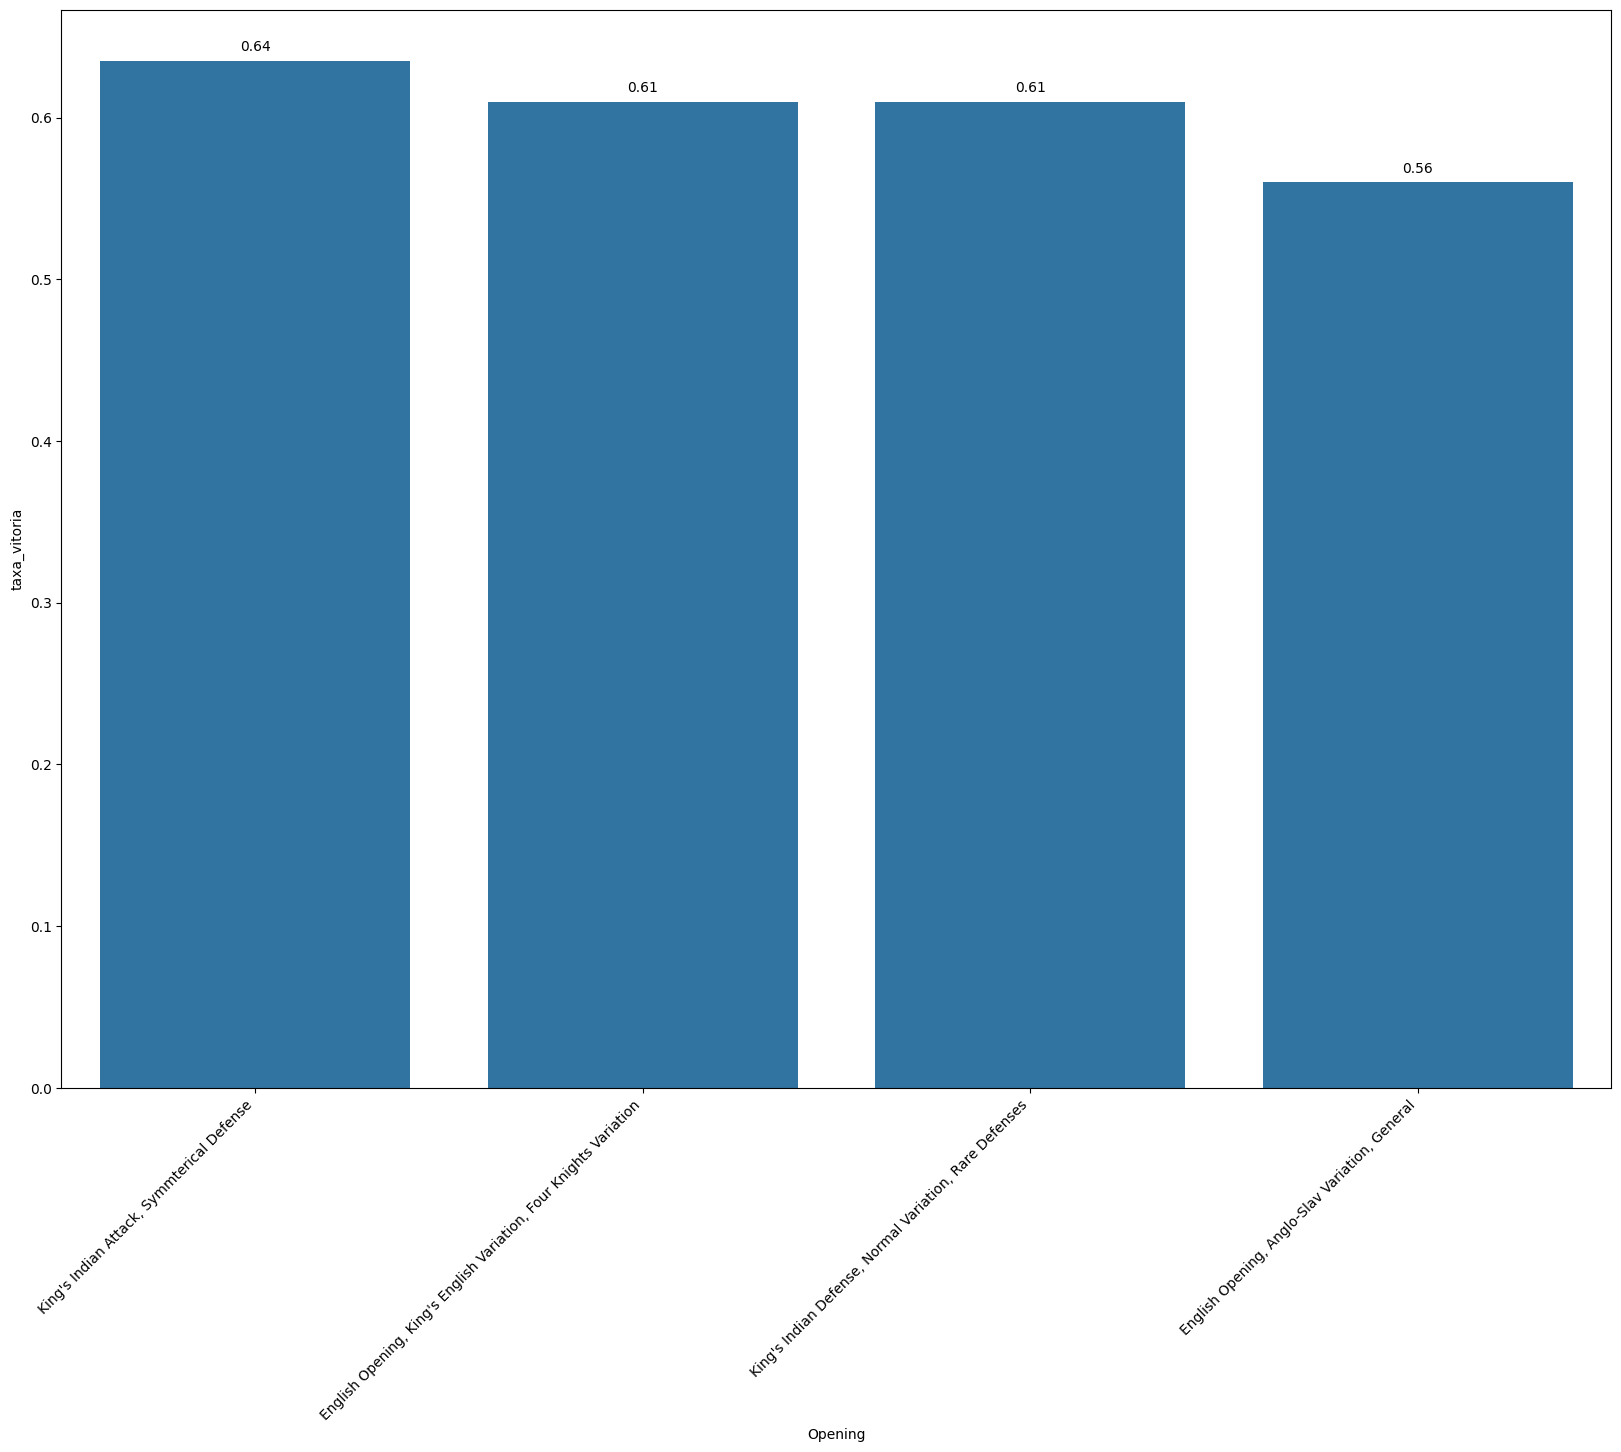

In [434]:
ax = sns.barplot(data=russos_df_win.head(), x='Opening', y='taxa_vitoria', errorbar=None)
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Nota-se que entre as 5 aberturas com maior taxa de vitórias todas são de brancas, para os Americanos 3 das 5 aberturas foram Siciliana, ja para os Russos 3 das 5 foram Índia do Rei e as outras duas foram Inglesas. importante ressatltar que apesar da defesa Francesa aparecer no top 2 dos Americanos, foram jogados apenas 3 games, por isso essa alta taxa de vitória

Olhar para as aberturas com maior taxa de derrota

In [435]:
americanos_df_loss = americanos_df.sort_values(by='taxa_derrota', ascending=False).reset_index(drop=True)
americanos_df_loss.head()

,Name,Color,Opening,N_games,N_wins,N_losses,N_draws,taxa_vitoria,taxa_derrota,taxa_empate
0,"Xiong, Jeffrey",black,"Catalan Opening, General",3,1,2,0,0.33,0.67,0.00
1,"Shankland, Samuel L",black,"King's Indian Attack, General",13,1,6,6,0.08,0.46,0.46
2,"Shankland, Samuel L",white,"Spanish Game, Closed Variations",7,1,3,3,0.14,0.43,0.43
3,"Caruana, Fabiano",black,"Sicilian Defense, Kan Variation, Polugaevsky V...",23,10,8,5,0.43,0.35,0.22
4,"Xiong, Jeffrey",white,"French Defense, Tarrasch Variation, Chistyakov...",3,2,1,0,0.67,0.33,0.00


In [436]:
russos_df_loss = russos_df.sort_values(by='taxa_derrota', ascending=False).reset_index(drop=True)
russos_df_loss.head()

,Name,Color,Opening,N_games,N_wins,N_losses,N_draws,taxa_vitoria,taxa_derrota,taxa_empate
0,"Grischuk, Alexander",black,"Sicilian Defense, Najdorf Variation, English A...",26,8,11,7,0.31,0.42,0.27
1,"Dubov, Daniil",black,"Sicilian Defense, Nyezhmetdinov-Rossolimo Atta...",29,5,10,14,0.17,0.34,0.48
2,"Andreikin, Dmitry",black,"Spanish Game, General",18,6,6,6,0.33,0.33,0.33
3,"Karjakin, Sergey",black,"Queen's Indian Defense, Fianchetto Variation, ...",42,8,12,22,0.19,0.29,0.52
4,"Grischuk, Alexander",black,"Spanish Game, General",38,12,11,15,0.32,0.29,0.39


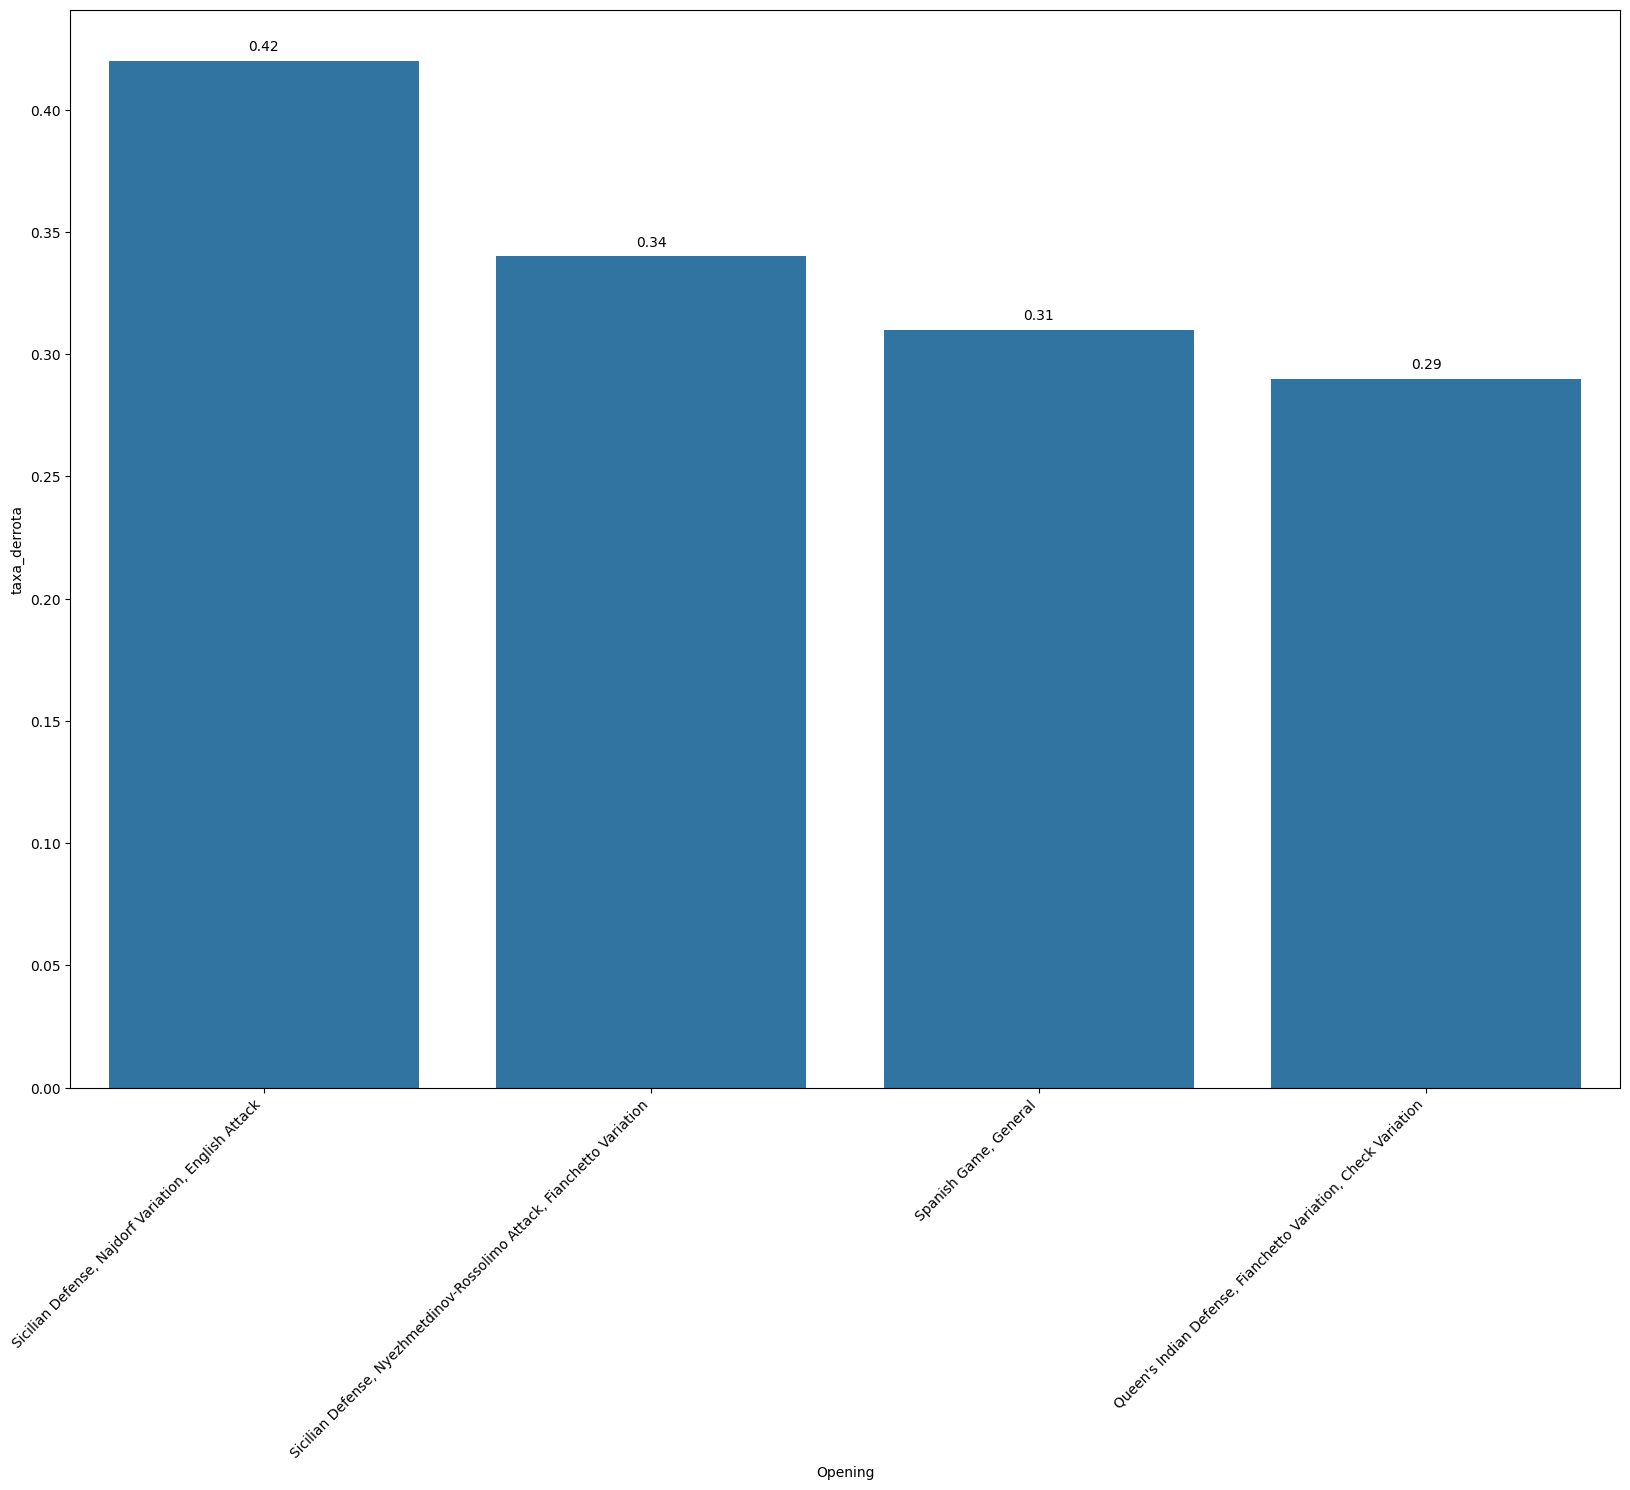

In [437]:
ax = sns.barplot(data=russos_df_loss.head(), x='Opening', y='taxa_derrota', errorbar=None)
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

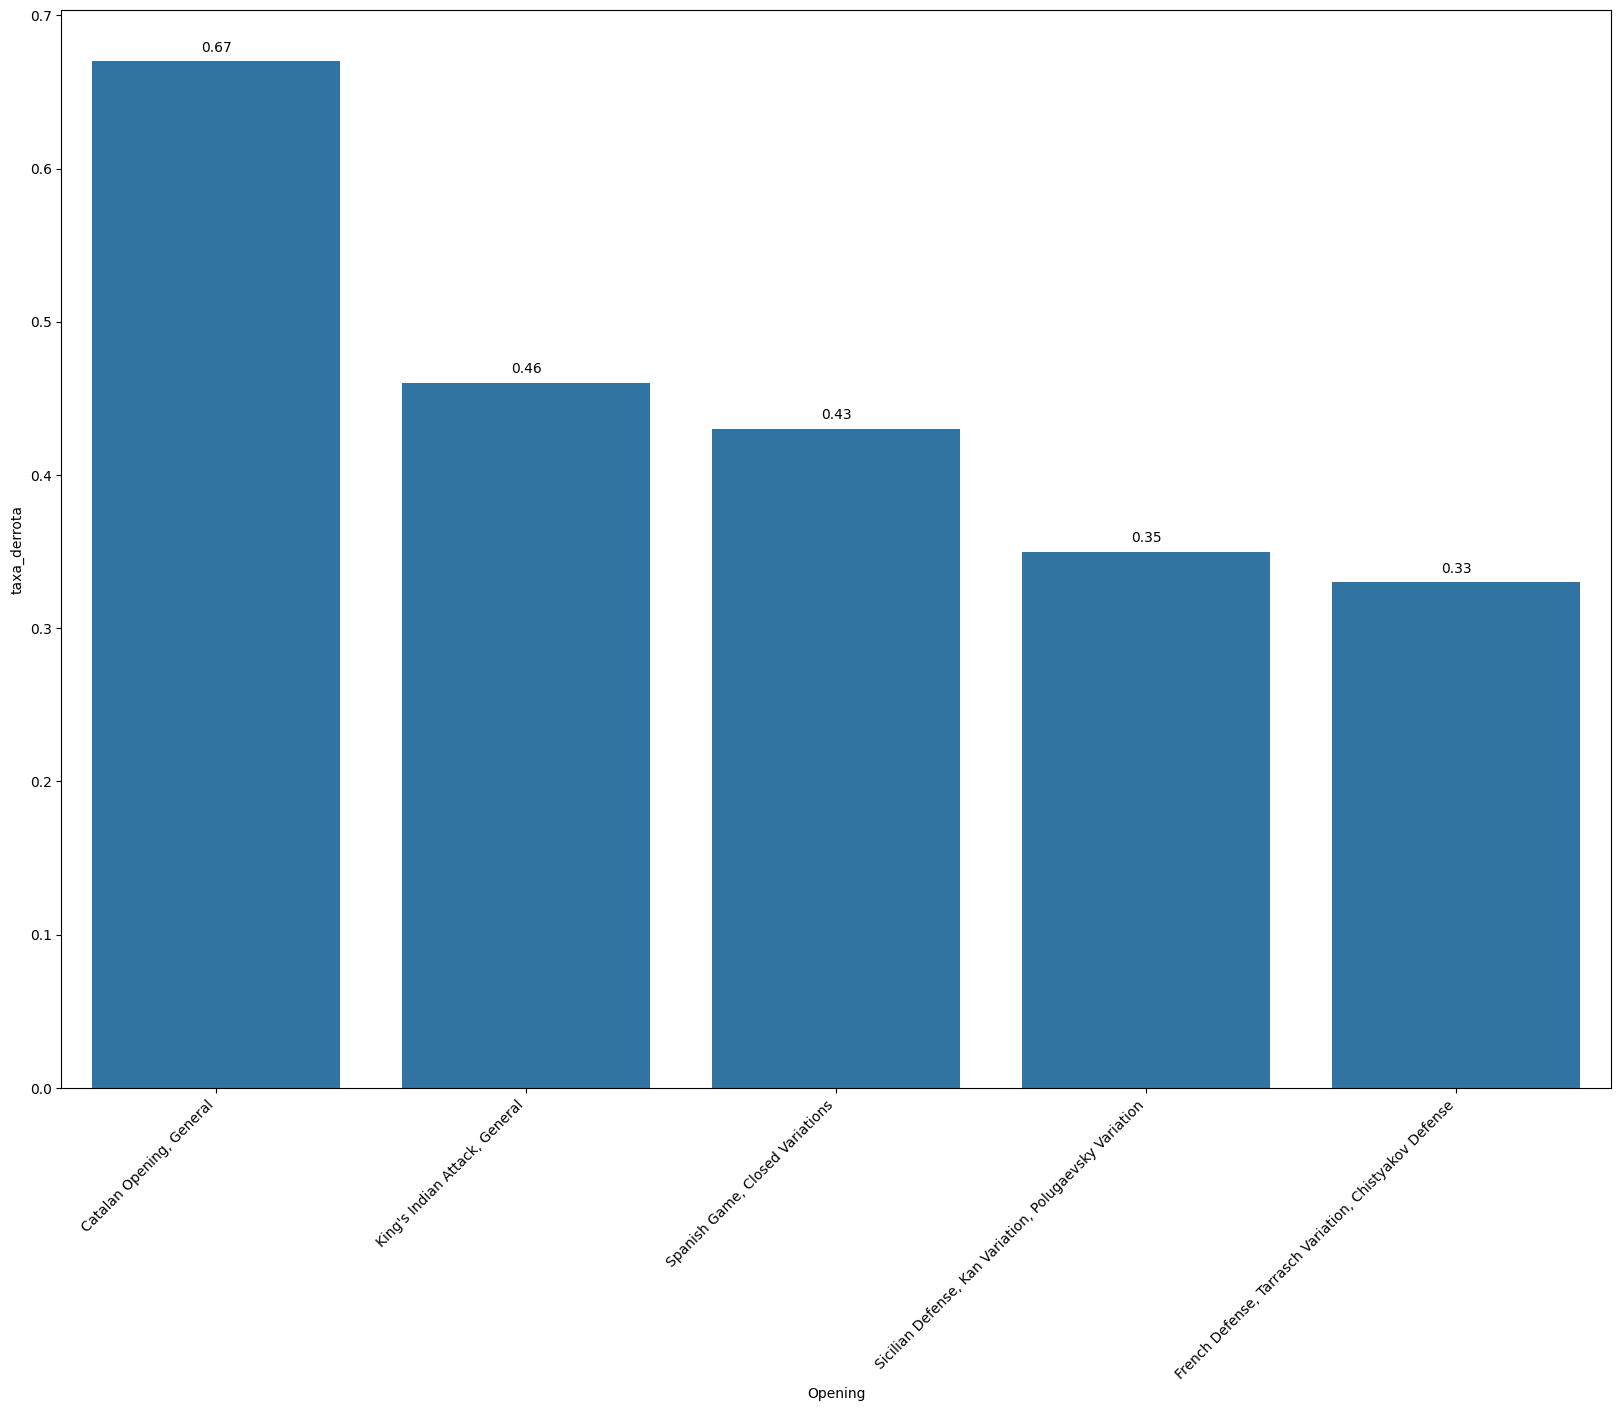

In [438]:
ax = sns.barplot(data=americanos_df_loss.head(), x='Opening', y='taxa_derrota', errorbar=None)
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [439]:
americanos_df['taxa_vitoria'].describe() , russos_df['taxa_vitoria'].describe()

(count    48.000000
 mean      0.360833
 std       0.145556
 min       0.080000
 25%       0.272500
 50%       0.330000
 75%       0.470000
 max       0.720000
 Name: taxa_vitoria, dtype: float64,
 count    48.000000
 mean      0.391458
 std       0.137856
 min       0.040000
 25%       0.317500
 50%       0.405000
 75%       0.500000
 max       0.710000
 Name: taxa_vitoria, dtype: float64)

In [440]:
americanos_df['taxa_derrota'].describe() , russos_df['taxa_derrota'].describe()

(count    48.000000
 mean      0.210208
 std       0.115639
 min       0.000000
 25%       0.140000
 50%       0.195000
 75%       0.262500
 max       0.670000
 Name: taxa_derrota, dtype: float64,
 count    48.000000
 mean      0.177708
 std       0.092166
 min       0.000000
 25%       0.110000
 50%       0.165000
 75%       0.252500
 max       0.420000
 Name: taxa_derrota, dtype: float64)

In [441]:
americanos_df['taxa_empate'].describe() , russos_df['taxa_empate'].describe()

(count    48.000000
 mean      0.430000
 std       0.160093
 min       0.000000
 25%       0.352500
 50%       0.425000
 75%       0.542500
 max       0.690000
 Name: taxa_empate, dtype: float64,
 count    48.000000
 mean      0.429792
 std       0.123469
 min       0.210000
 25%       0.357500
 50%       0.395000
 75%       0.485000
 max       0.870000
 Name: taxa_empate, dtype: float64)

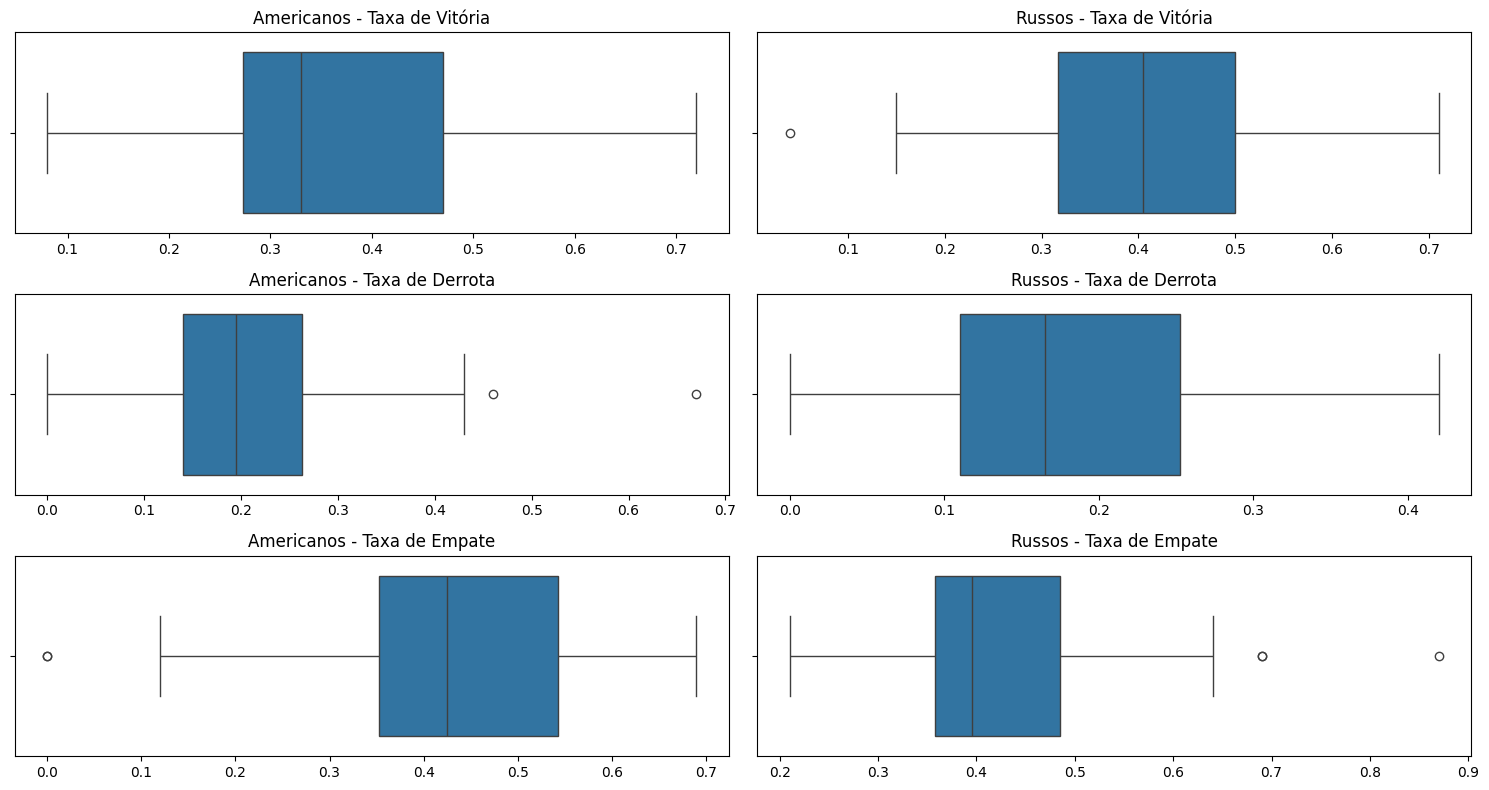

In [442]:
fig, ((b1, b2), (b3, b4), (b5, b6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 8))

sns.boxplot(x=americanos_df['taxa_vitoria'], ax=b1)
sns.boxplot(x=americanos_df['taxa_derrota'], ax=b3)
sns.boxplot(x=americanos_df['taxa_empate'], ax=b5)

sns.boxplot(x=russos_df['taxa_vitoria'], ax=b2)
sns.boxplot(x=russos_df['taxa_derrota'], ax=b4)
sns.boxplot(x=russos_df['taxa_empate'], ax=b6)

b1.set_title('Americanos - Taxa de Vitória')
b3.set_title('Americanos - Taxa de Derrota')
b5.set_title('Americanos - Taxa de Empate')
b2.set_title('Russos - Taxa de Vitória')
b4.set_title('Russos - Taxa de Derrota')
b6.set_title('Russos - Taxa de Empate')

b1.set_xlabel('')
b2.set_xlabel('')
b3.set_xlabel('')
b4.set_xlabel('')
b5.set_xlabel('')
b6.set_xlabel('')


plt.tight_layout()

plt.show()


Baseado nas medidas e nos boxplots das taxas das 3 aberturas mais jogadas pelos melhores jogadores de cada país, vemos que os Russos possuem a média de taxa de vitória maior(39.1% contra 36%), além disso o desvio-padrão é maior pros Americanos, ou seja, existe uma variabilidade mais alta em torno dessa média.

Em derrotas os Americanos possuem 21% contra 17.7% dos Russos, ja em empates ambos possuem 43%.


Como conclusão pode-se dizer que com relação a estilo de aberturas não há uma diferença tão visível entre os países, ambos jogam muito Siciliana, Ruy Lopez, e muitas variantes. Entretanto ao olharmos para o desempenho vemos que os Russos possuem uma taxa de vitória maior com uma taxa de derrota menor, além disso a média de rating é maior por parte dos Russos.

 Assim é possível dizer que os Russos tem um aproveitamento melhor nas partidas, além de no geral possuirem jogadores mais fortes

In [384]:
from google.colab import drive
import os

# Monta o Google Drive
drive.mount('/content/drive')

# Caminho para o seu notebook
notebook_path = '/content/análises_chess (2).ipynb'

# Caminho para o PDF de saída
pdf_output_path = '/content/drive/MyDrive/Análise Xadrez.pdf'

# Exporta para PDF usando nbconvert
os.system(f'jupyter nbconvert --to pdf "{notebook_path}" --output "{pdf_output_path}"')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0